# Q).1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [1]:
pip install -U spacy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
! pip install -U spacy

Defaulting to user installation because normal site-packages is not writeable


In [1]:
!python -m spacy download en

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 12.8/12.8 MB 3.3 MB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use
the full pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
musk = pd.read_csv('Elon_musk.csv', encoding='ISO-8859-1')
musk

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [4]:
musk.drop(['Unnamed: 0'],inplace=True, axis=1)
musk

Text
0                                @kunalb11 Im an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

# Text Preprocessing

In [5]:
musk = [Text.strip() for Text in musk.Text]
musk = [Text for Text in musk if Text]
musk

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [6]:
data = ' '.join(musk)
data

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [7]:
import string
no_punc_text = data.translate(str.maketrans('','',string.punctuation))
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [8]:
import re
no_url_text = re.sub(r'http\S+','', no_punc_text)
no_url_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox  Frodo was the underdoge\nAll thought he would fail\nHimself most of all  OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest  geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha  freewalletorg Any crypto wallet that won\x92t give you your private keys should

In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ithes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ithes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(no_url_text)
tokens

['kunalb11',
 'I\x92m',
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 'Clubhouse',
 'with',
 'kanyewest',
 'geoffkei

In [11]:
len(tokens)

20423

In [12]:
from nltk.corpus import stopwords
stopword = stopwords.words('english')
stopword.append('the')
no_stop_tokens = [word for word in tokens if not word in stopword]
no_stop_tokens

['kunalb11',
 'I\x92m',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'Have',
 'tried',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'next',
 'even',
 'Happy',
 'New',
 'Year',
 'Ox',
 'Frodo',
 'underdoge',
 'All',
 'thought',
 'would',
 'fail',
 'Himself',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'entertaining',
 'outcome',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'Just',
 'agree',
 'Clubhouse',
 'kanyewest',
 'geoffkeighley',
 'UnrealEngine',
 'It\x92s',
 'getting',
 'real',
 'Bought',
 'Dogecoin',
 'lil',
 'X',
 'toddler',
 'hodler',
 'JoshManMode',
 'He',
 'definitely',
 'issues',
 'sentencing',
 'seems',
 'bit',
 'high',
 'freewalletorg',
 'Thanks',
 '

In [13]:
len(no_stop_tokens)

15096

In [14]:
lower_words = [x.lower() for x in no_stop_tokens]
lower_words

['kunalb11',
 'i\x92m',
 'alien',
 'idaacarmack',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tried',
 'joerogan',
 'spotify',
 'great',
 'interview',
 'gtera27',
 'doge',
 'underestimated',
 'teslacn',
 'congratulations',
 'tesla',
 'china',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happy',
 'new',
 'year',
 'ox',
 'frodo',
 'underdoge',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'owensparks',
 'flcnhvy',
 'anonyx10',
 'haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'indeed',
 'tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'the',
 'entertaining',
 'outcome',
 'likely',
 'givedirectly',
 'just',
 'sent',
 'just',
 'agree',
 'clubhouse',
 'kanyewest',
 'geoffkeighley',
 'unrealengine',
 'it\x92s',
 'getting',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'joshmanmode',
 'he',
 'definitely',
 'issues',
 'sentencing',
 'seems',
 'bit',
 'high',
 'freewalletorg',
 'thanks',
 '

In [15]:
len(lower_words)

15096

In [16]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
stemmed_tokens

['kunalb11',
 'i\x92m',
 'alien',
 'idaacarmack',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tri',
 'joerogan',
 'spotifi',
 'great',
 'interview',
 'gtera27',
 'doge',
 'underestim',
 'teslacn',
 'congratul',
 'tesla',
 'china',
 'amaz',
 'execut',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happi',
 'new',
 'year',
 'ox',
 'frodo',
 'underdog',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'owenspark',
 'flcnhvi',
 'anonyx10',
 'haha',
 'thank',
 'flcnhvi',
 'anonyx10',
 'inde',
 'tweet',
 'definit',
 'repres',
 'realworld',
 'time',
 'alloc',
 'the',
 'entertain',
 'outcom',
 'like',
 'givedirectli',
 'just',
 'sent',
 'just',
 'agre',
 'clubhous',
 'kanyewest',
 'geoffkeighley',
 'unrealengin',
 'it\x92',
 'get',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'joshmanmod',
 'he',
 'definit',
 'issu',
 'sentenc',
 'seem',
 'bit',
 'high',
 'freewalletorg',
 'thank',
 'fix',
 'freewalletorg',
 'pleas',
 'unlock',
 'account',
 'ast

In [17]:
len(stemmed_tokens)

15096

In [18]:
! python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.5.0/en_core_web_sm-3.5.0-py3-none-any.whl (12.8 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [19]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [20]:
doc = nlp(' '.join(no_stop_tokens))
doc

kunalb11 Im alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox Frodo underdoge All thought would fail Himself OwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely represent realworld time allocation The entertaining outcome likely GiveDirectly Just sent Just agree Clubhouse kanyewest geoffkeighley UnrealEngine Its getting real Bought Dogecoin lil X toddler hodler JoshManMode He definitely issues sentencing seems bit high freewalletorg Thanks fixing freewalletorg Please unlock account AstroJordy U0001F923U0001F923 This true power haha freewalletorg Any crypto wallet wont give private keys avoided costs freewalletorg Your app sucks RT SpaceX NASA selected Falcon Heavy launch first two elements lunar Gateway together one mission ajtourville Yes BLKMDL3 RationalEtienne Adamklotz Once predic

In [21]:
lemma = [token.lemma_ for token in doc]
lemma

['kunalb11',
 'I\x92m',
 'alien',
 'IDAACarmack',
 'Ray',
 'trace',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'have',
 'try',
 'joerogan',
 'spotify',
 'great',
 'interview',
 'gtera27',
 'Doge',
 'underestimate',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'next',
 'even',
 'Happy',
 'New',
 'Year',
 'Ox',
 'Frodo',
 'underdoge',
 'all',
 'thought',
 'would',
 'fail',
 'Himself',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'the',
 'entertaining',
 'outcome',
 'likely',
 'GiveDirectly',
 'just',
 'send',
 'just',
 'agree',
 'Clubhouse',
 'kanyewest',
 'geoffkeighley',
 'UnrealEngine',
 'It\x92s',
 'get',
 'real',
 'buy',
 'Dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'JoshManMode',
 'he',
 'definitely',
 'issue',
 'sentencing',
 'seem',
 'bit',
 'high',
 'freewalletorg',
 'thank',
 'fix',
 'freewal

In [22]:
len(lemma)

15123

In [23]:
clean_tweets = ' '.join(lemma)
clean_tweets

'kunalb11 I\x92m alien IDAACarmack Ray trace Cyberpunk HDR nextlevel have try joerogan spotify great interview gtera27 Doge underestimate teslacn Congratulations Tesla China amazing execution last year now next even Happy New Year Ox Frodo underdoge all thought would fail Himself OwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely represent realworld time allocation the entertaining outcome likely GiveDirectly just send just agree Clubhouse kanyewest geoffkeighley UnrealEngine It\x92s get real buy Dogecoin lil x toddler hodler JoshManMode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account AstroJordy U0001F923U0001F923 this true power haha freewalletorg any crypto wallet won\x92t give private key avoid cost freewalletorg your app suck RT SpaceX NASA select Falcon Heavy launch first two element lunar Gateway together one mission ajtourville yes BLKMDL3 RationalEtienne Adamklotz once predict cash flow reas

# Feature Extraction
# Using Countvectorizer

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemma)

In [25]:
vectorizer.vocabulary_

{'kunalb11': 2051,
 'alien': 231,
 'idaacarmack': 1788,
 'ray': 2970,
 'trace': 3847,
 'cyberpunk': 961,
 'hdr': 1676,
 'nextlevel': 2506,
 'have': 1670,
 'try': 3882,
 'joerogan': 1971,
 'spotify': 3465,
 'great': 1608,
 'interview': 1899,
 'gtera27': 1627,
 'doge': 1114,
 'underestimate': 4015,
 'teslacn': 3692,
 'congratulations': 855,
 'tesla': 3686,
 'china': 739,
 'amazing': 257,
 'execution': 1325,
 'last': 2070,
 'year': 4288,
 'now': 2546,
 'next': 2505,
 'even': 1297,
 'happy': 1657,
 'new': 2502,
 'ox': 2663,
 'frodo': 1493,
 'underdoge': 4014,
 'all': 234,
 'thought': 3771,
 'would': 4263,
 'fail': 1361,
 'himself': 1722,
 'owensparks': 2660,
 'flcnhvy': 1435,
 'anonyx10': 286,
 'haha': 1642,
 'thanks': 3730,
 'indeed': 1837,
 'tweets': 3905,
 'definitely': 1016,
 'represent': 3052,
 'realworld': 2995,
 'time': 3790,
 'allocation': 236,
 'the': 3737,
 'entertaining': 1253,
 'outcome': 2640,
 'likely': 2132,
 'givedirectly': 1578,
 'just': 1998,
 'send': 3238,
 'agree': 200,

In [26]:
vectorizer.get_feature_names()

['005',
 '10',
 '100',
 '1000',
 '10000',
 '107',
 '10x',
 '11',
 '112',
 '11thhour',
 '12',
 '122',
 '13',
 '130pm',
 '13arm13arm',
 '13ericralph31',
 '14',
 '140pm',
 '149watt',
 '14yearold',
 '15',
 '150',
 '155',
 '16',
 '162',
 '17',
 '18',
 '1880s',
 '1b',
 '1matthewgarcia',
 '1st',
 '1stprinciples4l',
 '20',
 '200',
 '2007',
 '2008',
 '2009',
 '2012',
 '2017',
 '2020',
 '2021',
 '2024',
 '2026',
 '2030',
 '20k',
 '210',
 '218',
 '21st',
 '22',
 '225',
 '23',
 '230',
 '24',
 '240am',
 '247teslanew',
 '25',
 '250',
 '250kw',
 '25d',
 '25gunsteslacom',
 '25k',
 '25th',
 '28',
 '28delayslater',
 '28th',
 '29',
 '2k',
 '2nd',
 '2v',
 '30',
 '300',
 '301',
 '304',
 '304l',
 '31',
 '33',
 '330',
 '360',
 '37',
 '3800',
 '394',
 '39a',
 '3d',
 '3rd',
 '40',
 '400',
 '42',
 '420',
 '4227',
 '430',
 '43rd',
 '445pm',
 '448',
 '4530000',
 '45thspacewe',
 '4680',
 '479000',
 '48',
 '4d',
 '4th',
 '4thfromourstar',
 '50',
 '50000',
 '50k',
 '60',
 '60000',
 '65',
 '69420',
 '6f',
 '6k',
 '72

In [27]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
X.toarray().shape

(15123, 4321)

# Countvectorizer with n-grams(Bigrams & Trigrams)

In [29]:
cv_ngram_range = CountVectorizer(analyzer='word', ngram_range=(1,3), max_features = 100)
bow_matrix_ngram = cv_ngram_range.fit_transform(lemma)

In [30]:
print(cv_ngram_range.get_feature_names())
bow_matrix_ngram.toarray()

['actually', 'ajtourville', 'also', 'amp', 'austinbarnard45', 'big', 'car', 'cleantechnica', 'come', 'cool', 'could', 'day', 'dragon', 'earth', 'engine', 'ercxspace', 'erdayastronaut', 'evafoxu', 'exactly', 'falcon', 'felixschlang', 'first', 'flcnhvy', 'flight', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'idaacarmack', 'it', 'kristennetten', 'land', 'launch', 'lexfridman', 'like', 'lot', 'make', 'marcushousegame', 'maybe', 'mission', 'model', 'much', 'nasa', 'nasaspaceflight', 'need', 'new', 'next', 'no', 'not', 'one', 'people', 'ppathole', 'pretty', 'probably', 'production', 'rationaletienne', 're', 'right', 'rt', 'soon', 'space', 'spacestation', 'spacex', 'starship', 'still', 'sure', 'take', 'tesla', 'teslaownerssv', 'teslarati', 'tesmaniancom', 'test', 'that', 'the', 'there', 'thesheetztweetz', 'they', 'think', 'this', 'time', 'tobyliiiiiiiiii', 'true', 'u0001f923u0001f923', 'use', 'way', 'we', 'we re', 'week', 'well', 'wholemarsblog', 'will', 'work', 'would', 'yeah', 'ye

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Tf - Idf Vectorizer

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features = TfidfVectorizer(norm='l2', analyzer='word', ngram_range=(1,3), max_features=500)
tfidfv_matrix_ngram = tfidfv_ngram_max_features.fit_transform(lemma)

In [32]:
print(tfidfv_ngram_max_features.get_feature_names())
tfidfv_matrix_ngram.toarray()

['10', '100', '20', '2020', '28delayslater', '30', '60', 'able', 'absolutely', 'access', 'accurate', 'actually', 'adamklotz', 'add', 'ago', 'agree', 'ai', 'air', 'ajtourville', 'all', 'almost', 'already', 'also', 'although', 'amazing', 'amp', 'and', 'another', 'appear', 'apply', 'appreciate', 'archillect', 'around', 'as', 'astrobehnken', 'astrodoug', 'astrojordy', 'astronaut', 'austinbarnard45', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'berlin', 'berniesanders', 'beta', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'bs', 'build', 'but', 'buy', 'call', 'camera', 'can', 'car', 'cargo', 'casparstanley', 'cbass3d', 'cell', 'change', 'cleantechnica', 'close', 'cold', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulations', 'control', 'cool', 'cost', 'could', 'course', 'create', 'crew', 'crew1', 'cyberpunkgame', 'day', 'definitely', 'design', 'didn', 'difference', 'different', 'djsnm', 'dmcryan', 'do', 'dock', 'doesn',

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Generate Word Cloud

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def plot_cloud(wordcloud):
    plt.figure(figsize=(50,40))
    plt.imshow(wordcloud)
    plt.axis('off');

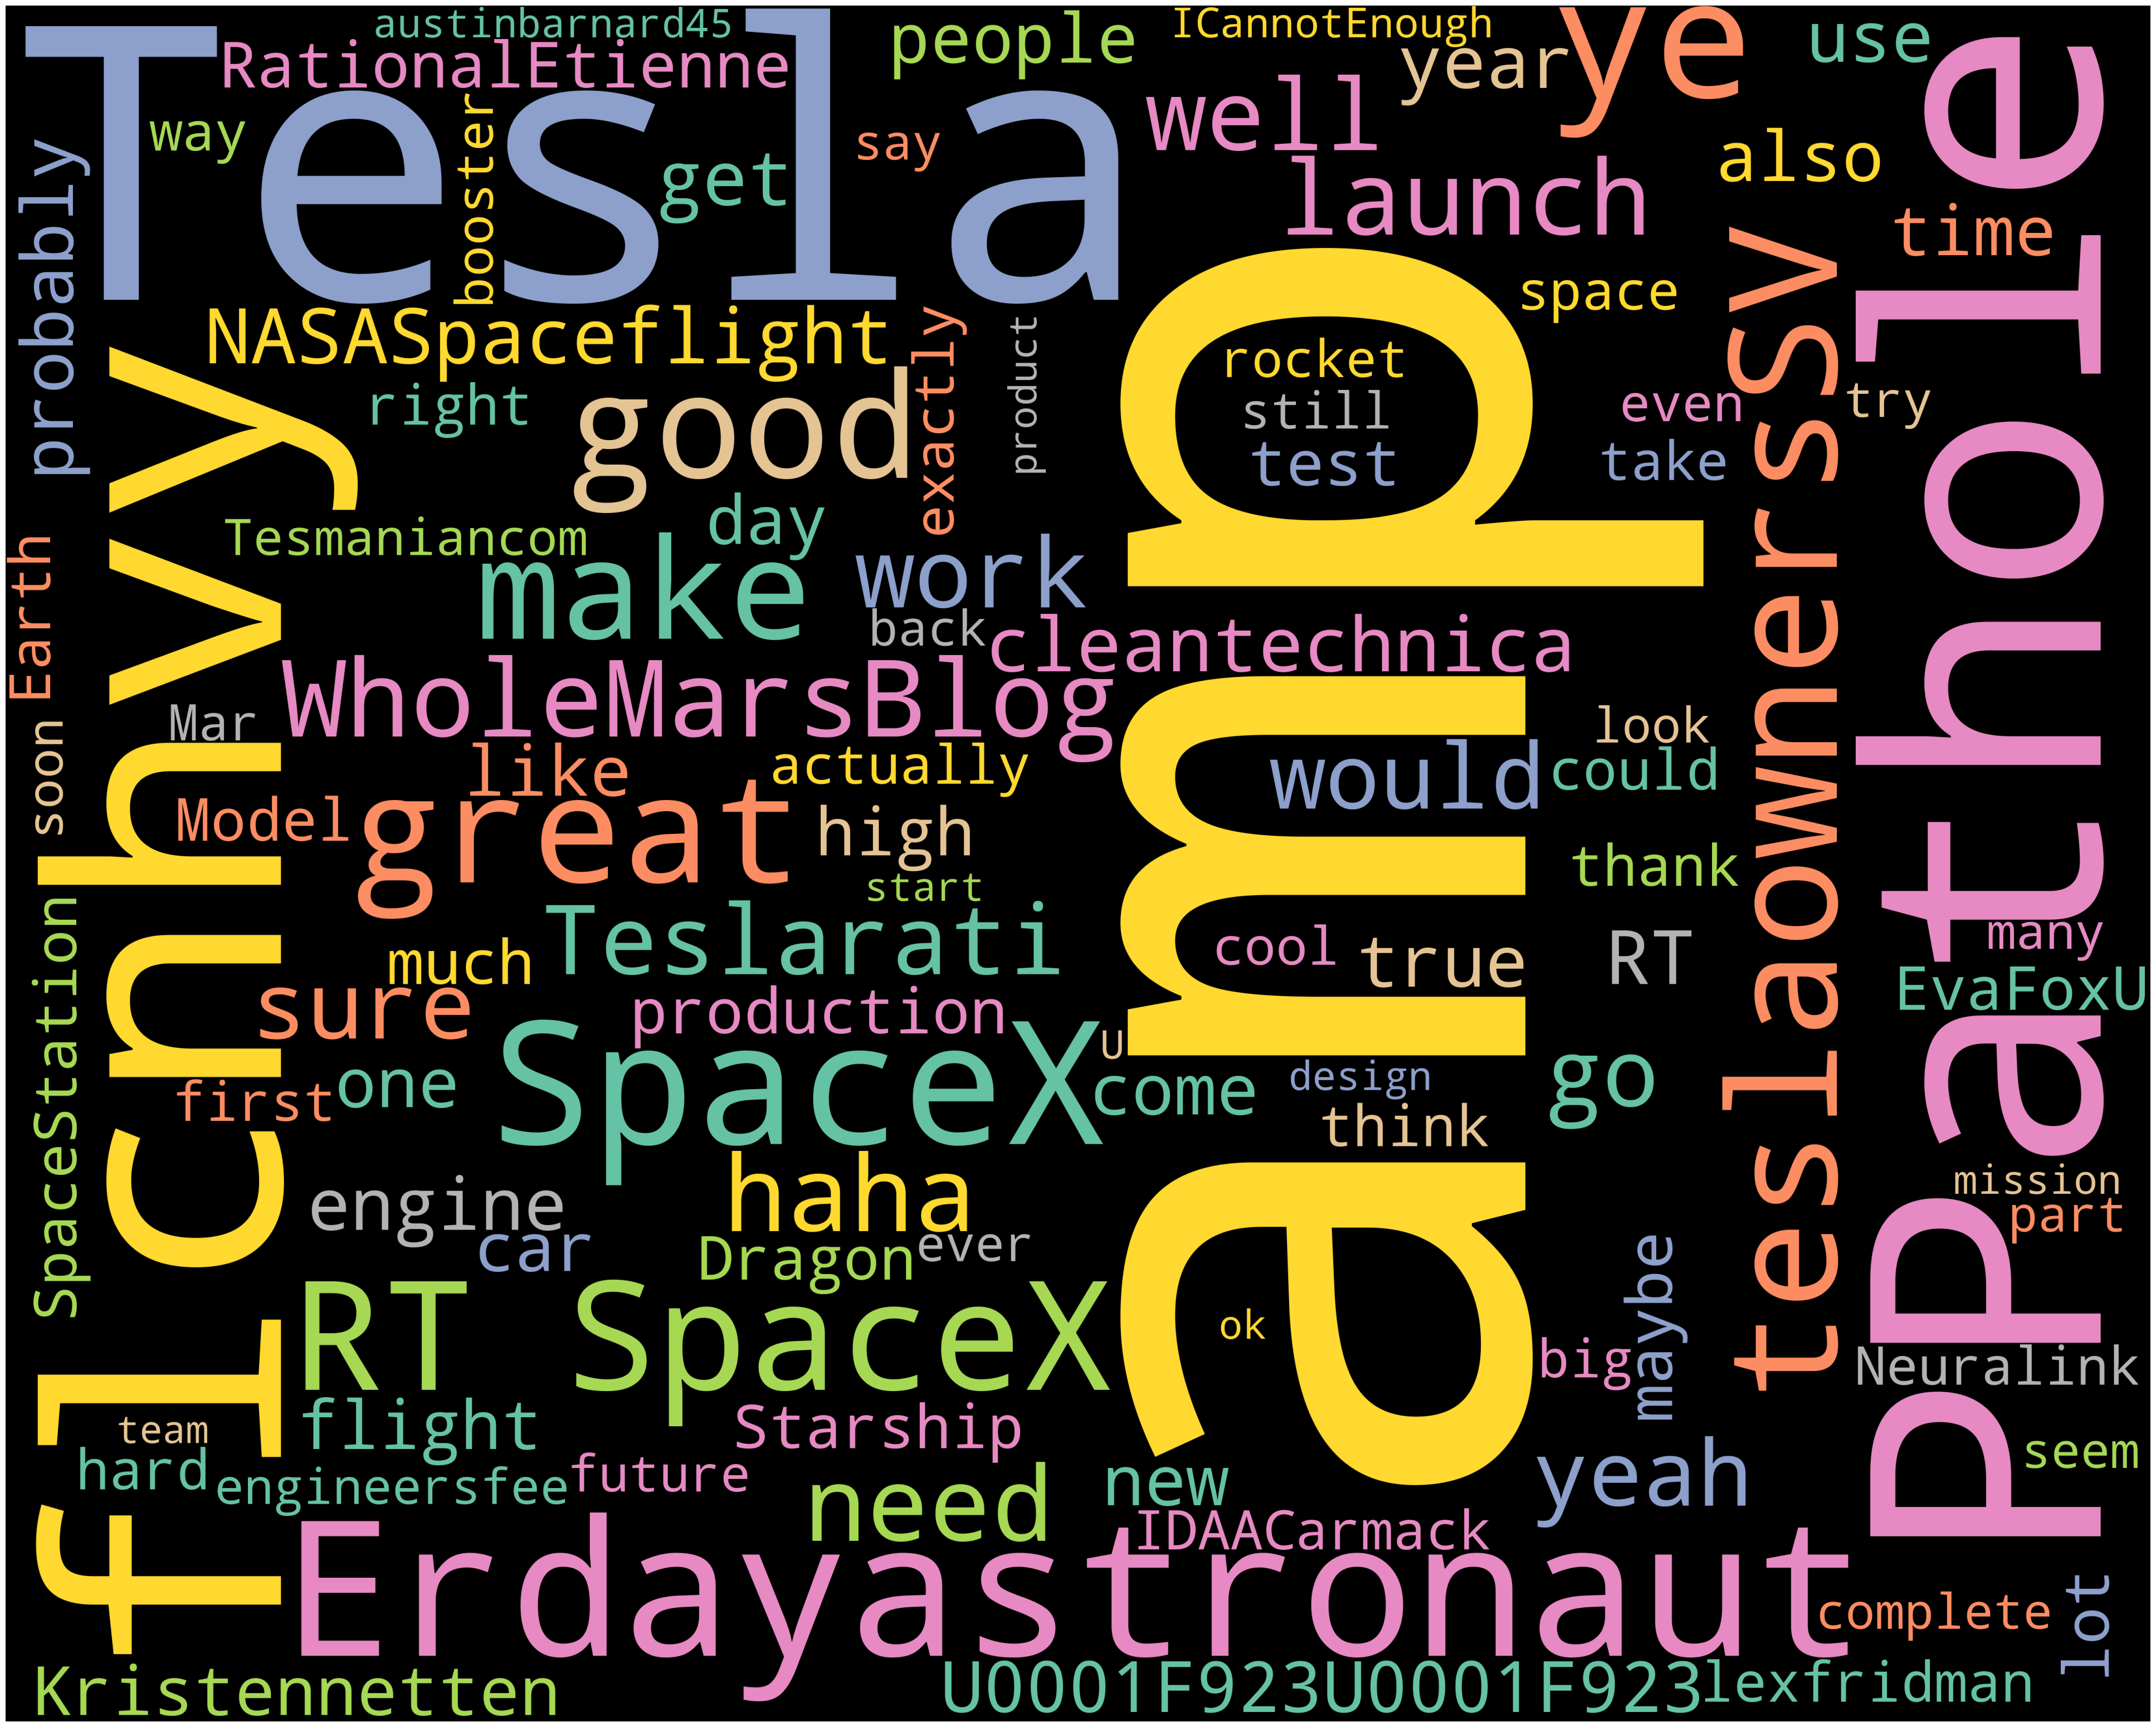

In [34]:
stopword.append('will')
wordcloud = WordCloud(width = 5000, height = 4000, background_color = 'black', max_words=100, colormap = 'Set2', stopwords=stopword).generate(clean_tweets)

plot_cloud(wordcloud)

# Named Entity Recognitiom

In [35]:
import spacy
nlp = spacy.load('en_core_web_sm')
one_block = clean_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter = True)

In [36]:
for token in doc_block:
    print(token, token.pos_)

kunalb11 PROPN
Im PROPN
alien PROPN
IDAACarmack PROPN
Ray PROPN
trace NOUN
Cyberpunk PROPN
HDR PROPN
nextlevel NOUN
have AUX
try VERB
joerogan PROPN
spotify VERB
great ADJ
interview NOUN
gtera27 NOUN
Doge PROPN
underestimate VERB
teslacn NOUN
Congratulations PROPN
Tesla PROPN
China PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV
next ADV
even ADV
Happy PROPN
New PROPN
Year PROPN
Ox PROPN
Frodo PROPN
underdoge NOUN
all DET
thought NOUN
would AUX
fail VERB
Himself PROPN
OwenSparks PROPN
flcnhvy PROPN
anonyx10 PROPN
Haha PROPN
thanks PROPN
flcnhvy PROPN
anonyx10 PROPN
Indeed PROPN
Tweets PROPN
definitely ADV
represent VERB
realworld NOUN
time NOUN
allocation NOUN
the DET
entertaining ADJ
outcome NOUN
likely ADV
GiveDirectly PROPN
just ADV
send AUX
just ADV
agree VERB
Clubhouse PROPN
kanyewest PROPN
geoffkeighley PROPN
UnrealEngine PROPN
Its PROPN
get VERB
real ADJ
buy NOUN
Dogecoin PROPN
lil NOUN
x PUNCT
toddler NOUN
hodler PROPN
JoshManMode PROPN
he PRON
definitely ADV
issu

In [37]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs)

['trace', 'nextlevel', 'try', 'spotify', 'interview', 'gtera27', 'underestimate', 'teslacn', 'execution', 'year', 'underdoge', 'thought', 'fail', 'represent', 'realworld', 'time', 'allocation', 'outcome', 'agree', 'get', 'buy', 'lil', 'toddler', 'issue', 'sentencing', 'seem', 'bit', 'freewalletorg', 'thank', 'fix', 'unlock', 'account', 'power', 'haha', 'wallet', 'give', 'avoid', 'cost', 'freewalletorg', 'app', 'suck', 'select', 'launch', 'element', 'mission', 'predict', 'cash', 'flow', 'endeavor', 'need', 'pass', 'cash', 'flow', 'year', 'cost', 'ton', 'carbon', 'sequester', 'value', 'product', 'make', 'scalable', 'mean', 'price', 'country', 'difference', 'tax', 'amp', 'shipping', 'tobyliiiiiiiiii', 'intend', 'idea', 'apply', 'team', 'manage', 'carbon', 'capture', 'prize', 'receive', 'stock', 'comp', 'stockoption', 'take', 'table', 'that\x92s', 'miss', 'work', 'go', 'seem', 'bit', 'itsallrisky', 'appear', 'fix', 'unit', 'time', 'kevinmgill', 'michaelhodapp', 'launch', 'tower', 'stack', 

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x:x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']
wf_df

word  count
0             amp     80
1            make     64
2          launch     55
3            year     47
4            need     46
...           ...    ...
2025  buzzindelhi      1
2026       payout      1
2027       answer      1
2028     priority      1
2029   propaganda      1

[2030 rows x 2 columns]

<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

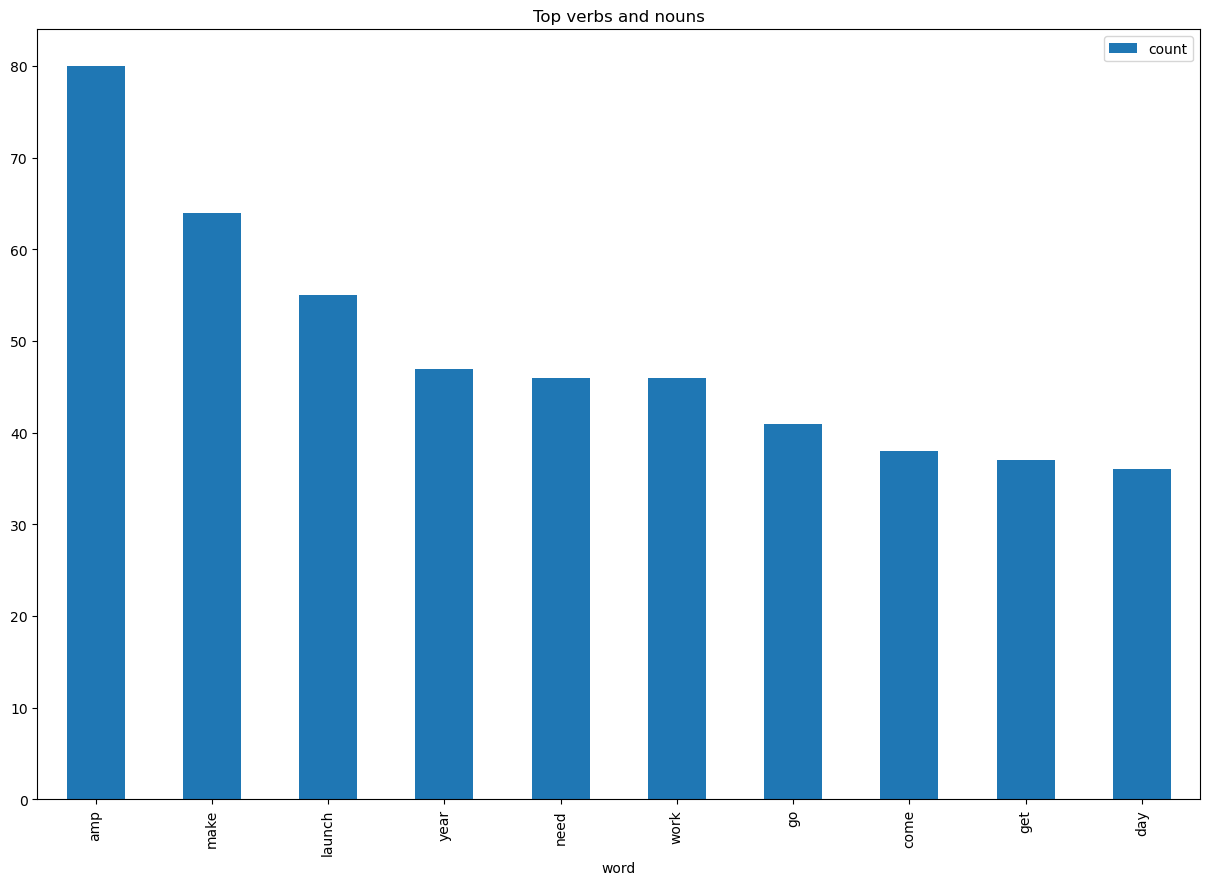

In [39]:
wf_df[0:10].plot.bar(x='word', figsize=(15,10), title='Top verbs and nouns')

# Emotion Mining - Sentiment Analysis

In [40]:
from nltk import tokenize
sentence = tokenize.sent_tokenize(' '.join(musk))
sentence

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [41]:
sent_df = pd.DataFrame(sentence, columns=['sentence'])
sent_df

sentence
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated @teslacn Congr...
4                   Now on to the next for even more!!
..                                                 ...
919  @kenyanwalstreet Not actually a payout, just a...
920  It may never pay out, as the stock cant b
 ht...
921                                    Details Aug 28.
922  AI symbiosis while u wait @vistacruiser7 @flcn...
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...

[924 rows x 1 columns]

In [42]:
# Emotion lexicon - Afinn 
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='Latin-1')
afinn

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [44]:
afinnity_scores = afinn.set_index('word')['value'].to_dict()
afinnity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [47]:
# custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon=afinnity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

calculate_sentiment(text='cruel')

-3

In [48]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [49]:
# how many words are in the sentence ?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [50]:
sent_df.sort_values(by='sentiment_value')

sentence  sentiment_value  \
647  Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...               -8   
837  Cool Model 3 review by @iamjamiefoxx https://t...               -8   
64   Also, the road to hell is mostly paved with ba...               -7   
920  It may never pay out, as the stock cant b
 ht...               -4   
680  Occasional flights from land are ok, but frequ...               -4   
..                                                 ...              ...   
81   @teslaownersSV This is a good one @MrBeastYT I...               13   
585  The open areas
 https://t.co/rabjKrtQlw @Sav...               14   
105  @Erdayastronaut @SpaceX Was also thinking that...               16   
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               16   
719  We just havent observed the
 https://t.co/mez...               17   

     word_count  
647          60  
837          61  
64           11  
920          31  
680          39  
..          ...  
81           38  
585         138  
105          94  
36          231  
719          72  

[924 rows x 3 columns]

In [51]:
# sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.352814
std        2.692026
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [52]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
4                   Now on to the next for even more!!                0   
5                            Happy New Year of the Ox!                0   
6    https://t.co/9WFKMYu2oj Frodo was the underdog...               -2   
..                                                 ...              ...   
919  @kenyanwalstreet Not actually a payout, just a...                0   
920  It may never pay out, as the stock cant b
 ht...               -4   
921                                    Details Aug 28.                0   
922  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  
0            13  
1             4  
4             8  
5             6  
6            14  
..          ...  
919          11  
920          31  
921           3  
922          47  
923          15  

[489 rows x 3 columns]

In [53]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

sentence  sentiment_value  \
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
7    https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...                2   
9    The most entertaining outcome is the most like...                3   
17   Back to work I go @CapybaraSurfer @MattWallace...                4   
..                                                 ...              ...   
911                       He was one of the very best.                3   
913  @Ali_Afshari In general, we need to improve ho...                4   
915  @burakaydik True Wow, IHOP &amp; GitHub are cl...                3   
917               This is both great &amp; terrifying.                3   
918  Everything weve ever sensed or thought has be...                2   

     word_count  
2             4  
3            13  
7            10  
9           109  
17           38  
..          ...  
911           7  
913          87  
915          15  
917           6  
918          17  

[435 rows x 3 columns]

In [54]:
# Adding index column
sent_df['index'] = range(0,len(sent_df))
sent_df

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
919  @kenyanwalstreet Not actually a payout, just a...                0   
920  It may never pay out, as the stock cant b
 ht...               -4   
921                                    Details Aug 28.                0   
922  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  index  
0            13      0  
1             4      1  
2             4      2  
3            13      3  
4             8      4  
..          ...    ...  
919          11    919  
920          31    920  
921           3    921  
922          47    922  
923          15    923  

[924 rows x 4 columns]

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

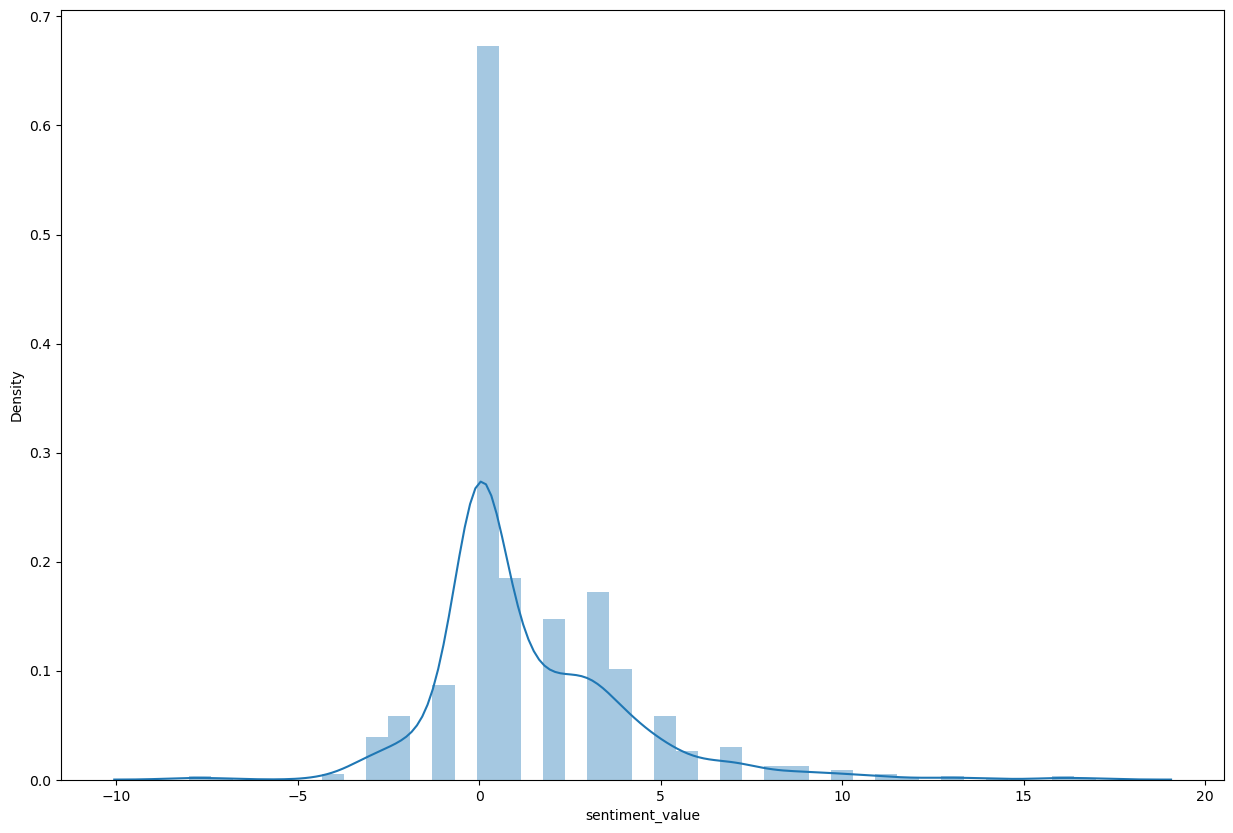

In [56]:
# plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

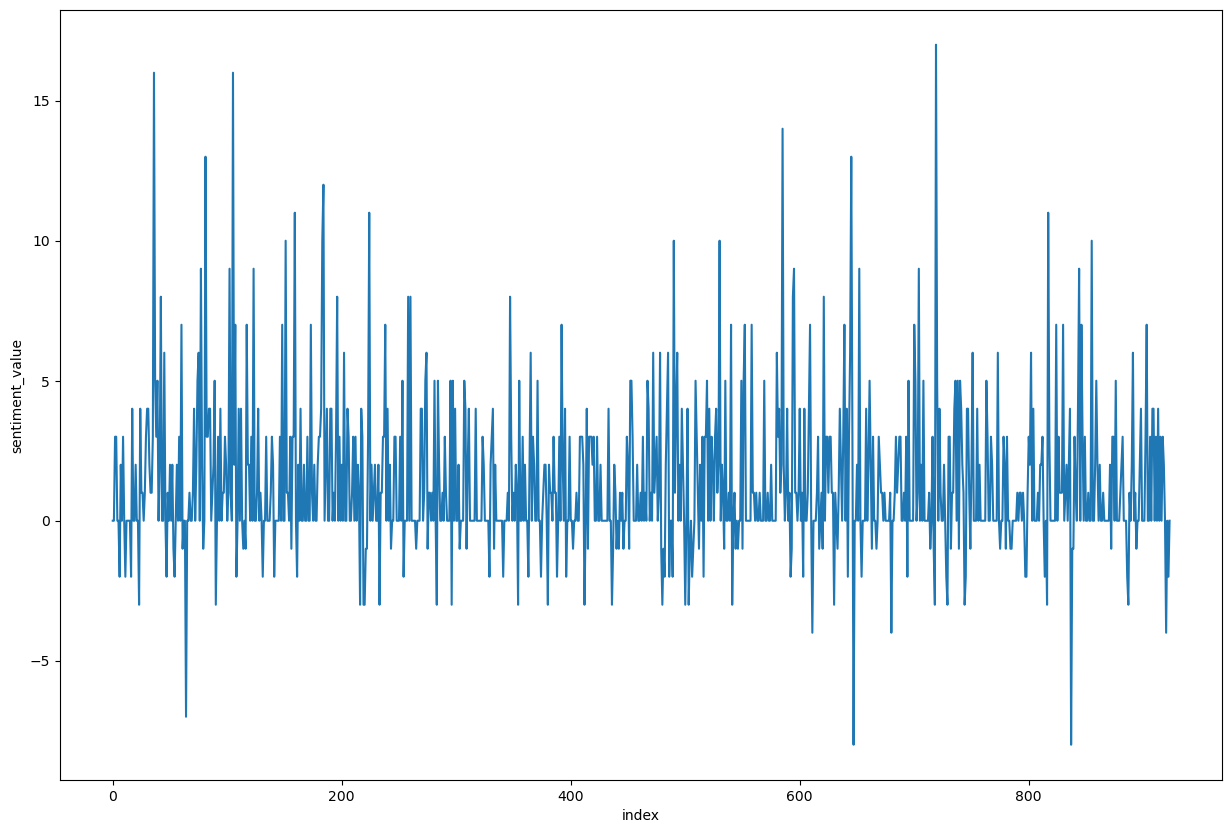

In [57]:
# plotting the line plot for sentiment value for whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)